In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
#from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier,AdaBoostClassifier

from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report,precision_recall_curve,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder

from scipy import stats

In [2]:
student_db = pd.read_csv('college_student_placement_dataset.csv',sep = ',')
student_db.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [3]:
student_db.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No
9999,CLG0060,109,9.41,9.77,8,No,3,5,5,No


In [4]:
encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(student_db['Placement']),name='Placement')
X = student_db.drop(columns=['College_ID','Placement'])
X['Internship_Experience'] = encoder.fit_transform(student_db['Internship_Experience'])
student = pd.concat([y,X],axis=1)

In [5]:
student,student_test = train_test_split(student,test_size=.3,shuffle=True)

In [6]:
X.columns

Index(['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed'],
      dtype='object')

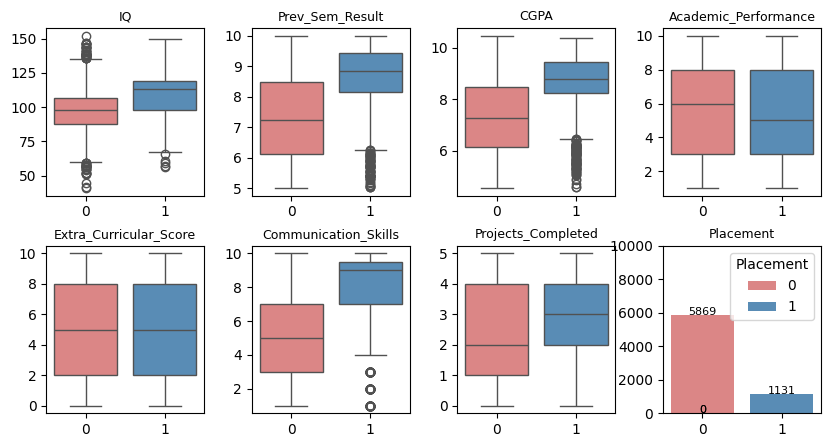

In [7]:
continuas = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance','Extra_Curricular_Score','Communication_Skills', 'Projects_Completed']
palette = {1: "#4a8dc4", 0: "#e97878"}

fig,ax = plt.subplots(figsize=(10,5),ncols=4,nrows=2)
ax = ax.ravel()
for i,continua in enumerate(continuas):
    sns.boxplot(
        data =student,
        x='Placement',
        y=continua,
        ax=ax[i],
        hue='Placement',
        palette=palette,
        legend=False,
    )
    ax[i].set_title(continua,fontsize=9)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')



sns.countplot(
    student,
    x='Placement',  
    ax=ax[7] ,
    hue='Placement',
    palette=palette,
    legend=True
)
ax[7].set_ylabel('')
ax[7].set_title('Placement',fontsize=9),
ax[7].set_xlabel('')
ax[7].set_ylim(0,10_000)
# Añadir los valores encima de las barras

for p in ax[7].patches:
    height = p.get_height()
    ax[7].text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,  # un poco por encima de la barra
        s=int(height),
        ha='center',
        color='black',  # cambia a 'white' si el fondo es oscuro
        fontsize=8
    )

plt.subplots_adjust(hspace=.3,wspace=.3)

plt.show()

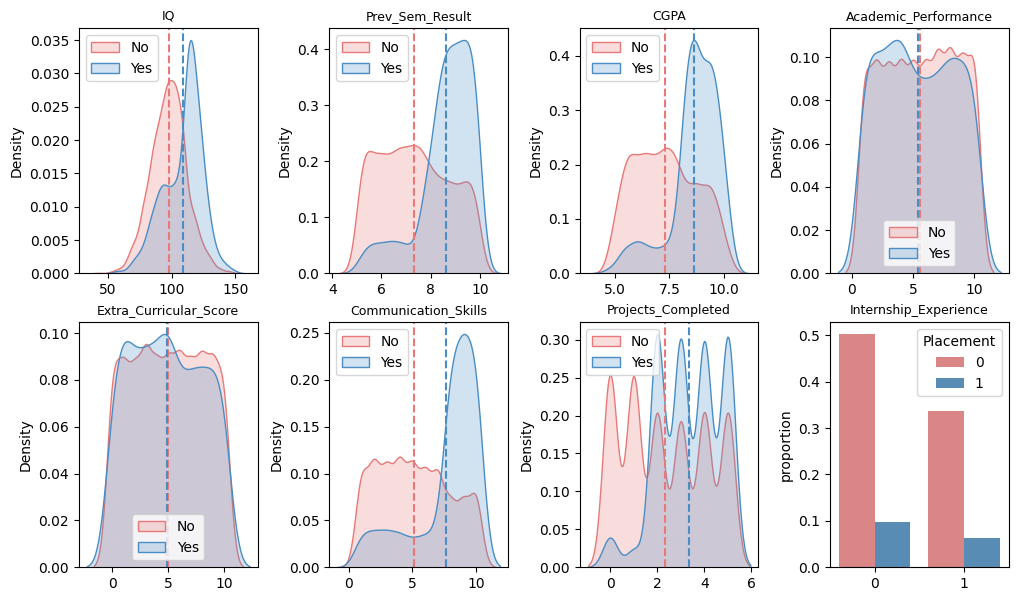

In [8]:
fig,ax = plt.subplots(figsize=(12,7),ncols=4,nrows=2)
ax = ax.ravel()
mask_0 = (student['Placement']==0)
mask_1 = (student['Placement']==1)

for i,continua in enumerate(continuas):
    sns.kdeplot(data=student[mask_0],x=continua,label='No',fill=True,ax=ax[i],hue='Placement',palette=palette)
    sns.kdeplot(data=student[mask_1],x=continua,label='Yes',fill=True,ax=ax[i],hue='Placement',palette=palette)
    

    media_0 = student[mask_0][continua].mean()
    media_1 = student[mask_1][continua].mean()
    ax[i].axvline(media_0, color=palette[0], linestyle='--', linewidth=1.5 )
    ax[i].axvline(media_1, color=palette[1], linestyle='--', linewidth=1.5)

    ax[i].set_title(continua,fontsize=9)
    ax[i].set_xlabel('')
    ax[i].legend()




sns.countplot(data=student,
              x='Internship_Experience',
              hue='Placement',ax=ax[7],palette=palette,stat='proportion')


ax[7].set_title('Internship_Experience',fontsize=9)
ax[7].set_xlabel('')
plt.subplots_adjust(hspace=.2,wspace=.4)
plt.show()

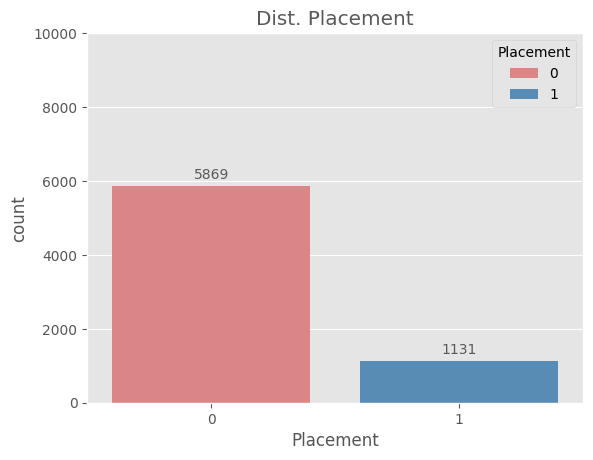

In [9]:
plt.style.use('ggplot')
ax = sns.countplot(
    student,
    x='Placement',
    hue='Placement',
    palette=palette,
)




for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3,color='#5a5959')

ax.set_title('Dist. Placement',color="#5a5959")
plt.ylim(0,10_000)
plt.show()

In [10]:
best_predictors = ['Prev_Sem_Result', 'CGPA', 'Communication_Skills']

In [11]:
xtrain,ytrain = student[best_predictors],student['Placement']
xtest,ytest  = student_test[best_predictors],student_test['Placement']

## Arbol de Decisión

In [12]:
import math
m  = xtrain.shape[0]
max_depth = [ num for num in range(2,math.ceil(np.log2(m) +1  ))]
atipicos = [.05, .025, .01 , .001]
min_samples_split =[ int(at*m) for at in atipicos]
print('Nodos máximos:',max_depth)
print('Nº mínino de muestras en hoja:',min_samples_split)

Nodos máximos: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Nº mínino de muestras en hoja: [350, 175, 70, 7]


In [13]:
param_grid = {
    'max_depth':max_depth,
    #'min_samples_split':min_samples_split
}

cv = 5

grid_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv
)

grid_tree.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
             scoring='accuracy')

In [14]:
from scipy import stats

means = grid_tree.cv_results_['mean_test_score']
stds = grid_tree.cv_results_['std_test_score']
lower,upper = [],[]
for i in range(means.shape[0]):

    intervalo = stats.t.interval(
        0.95,
        df=cv-1,
        loc=means[i],
        scale=stds[i]
    )
    lower.append(intervalo[0])
    upper.append(intervalo[1])

In [15]:
pd.DataFrame({
    'means':means,
    'stds':stds,
    'IC lower':lower,
    'IC upper':upper
})

,means,stds,IC lower,IC upper
0,0.901143,0.006949,0.881850,0.920436
1,0.901000,0.007194,0.881026,0.920974
2,0.899429,0.007048,0.879860,0.918997
3,0.899143,0.007360,0.878709,0.919576
4,0.896000,0.007897,0.874074,0.917926
5,0.895143,0.007578,0.874103,0.916183
6,0.893429,0.006168,0.876304,0.910553
7,0.887143,0.003642,0.877031,0.897255
8,0.885143,0.006168,0.868019,0.902267
9,0.877571,0.005743,0.861627,0.893516


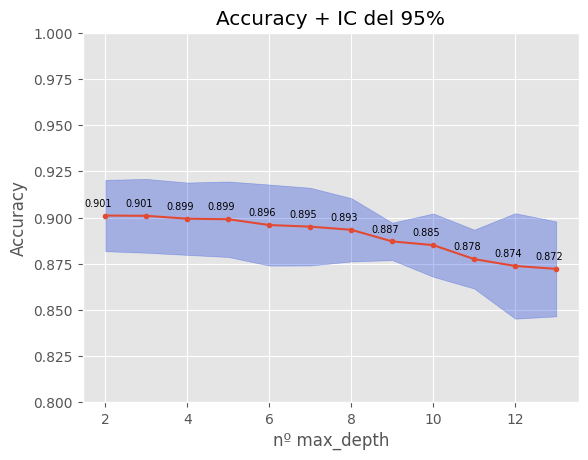

In [16]:
fig,ax= plt.subplots()

ax.plot(max_depth,means,marker='.')
ax.fill_between(max_depth,lower, upper,color="#0e34dbc1",alpha=.3)


ax.set_ylim(0.8,1)
ax.set_title('Accuracy + IC del 95%')
ax.set_xlabel('nº max_depth')
ax.set_ylabel('Accuracy')
for x,y in zip(max_depth,means):
    ax.text(x-0.5,y+.005,f'{y:.3f}',fontsize=7)
plt.show()

In [17]:
import pprint
pprint.pprint(grid_tree.best_estimator_.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}


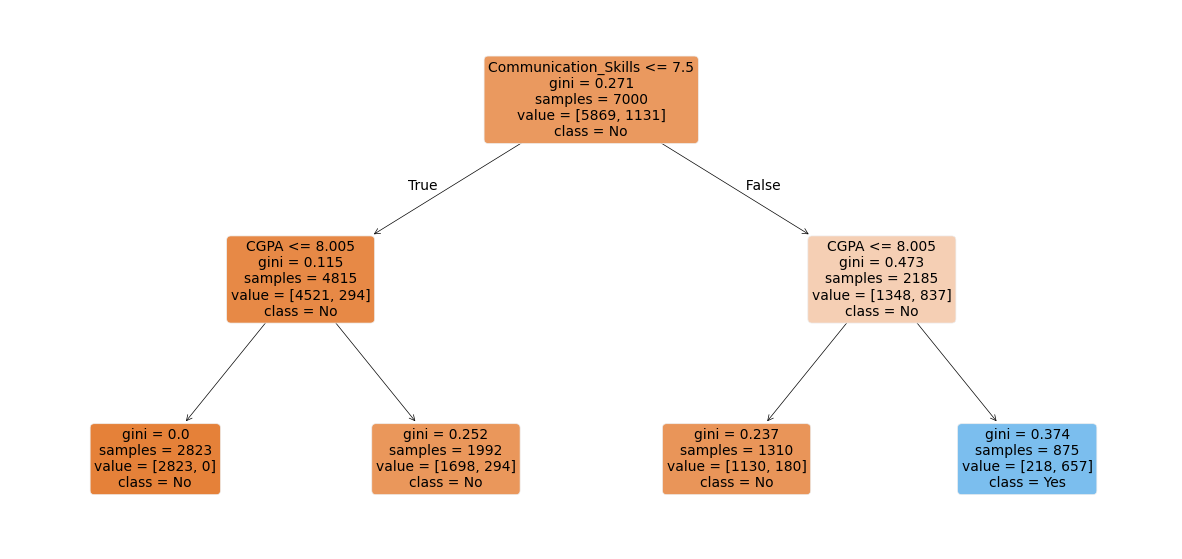

In [18]:
best_tree = grid_tree.best_estimator_

from sklearn.tree import plot_tree
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(15,7))
plot_tree(best_tree,
          feature_names=xtrain.columns,
          class_names=["No","Yes"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

In [19]:
print(export_text(best_tree,feature_names=best_predictors))

|--- Communication_Skills <= 7.50
|   |--- CGPA <= 8.01
|   |   |--- class: 0
|   |--- CGPA >  8.01
|   |   |--- class: 0
|--- Communication_Skills >  7.50
|   |--- CGPA <= 8.01
|   |   |--- class: 0
|   |--- CGPA >  8.01
|   |   |--- class: 1



In [20]:
moda =  ytest.value_counts(normalize=True)[0]
print(f'Al precedir la moda se obtiene un Accuracy del {moda:.4f}')

Al precedir la moda se obtiene un Accuracy del 0.8240


In [21]:
def metricas(estimador,xtest,ytest,probs=False,threshold=0.5):
    if not probs:
        ypred = estimador.predict(xtest)
        accuracy = accuracy_score(ytest,ypred)
        mat_confusion = confusion_matrix(ytest,ypred)
        report = classification_report(ytest,ypred)

        print('Accuracy:',accuracy)
        print('Matriz de Confusión \n',mat_confusion)
        print('Reporte de clasificación\n',report)

    if probs:
        yproba = estimador.predict_proba(xtest)[:,1]
        ypred = (yproba >= threshold).astype(int)
        accuracy = accuracy_score(ytest,ypred)
        mat_confusion = confusion_matrix(ytest,ypred)
        report = classification_report(ytest,ypred)

        print('Accuracy:',accuracy)
        print('Matriz de Confusión \n',mat_confusion)
        print('Reporte de clasificación\n',report)

        
        fpr,tpr,thresholds= roc_curve(ytest,yproba)
        auc = roc_auc_score(ytest,yproba)

        print('AUC:',auc)
        print('Umbrales:',thresholds)
        fig,ax = plt.subplots(figsize=(5,5))
        ax.plot(fpr, tpr, marker='o', label=f'ROC curve (AUC = {auc:.2f})', color='navy')
        ax.plot([0,1], [0,1], 'k--', label='Random Model')

        # Señalamos el punto óptimo

        ax.set_xlabel('False Positive Rate')
        ax.set_title('Receiver Operating Characteristic (ROC)')
        ax.legend(loc='lower right')
        plt.grid(True)
        plt.show()



Accuracy: 0.889
Matriz de Confusión 
 [[2381   91]
 [ 242  286]]
Reporte de clasificación
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      2472
           1       0.76      0.54      0.63       528

    accuracy                           0.89      3000
   macro avg       0.83      0.75      0.78      3000
weighted avg       0.88      0.89      0.88      3000

AUC: 0.8620699562371286
Umbrales: [       inf 0.75085714 0.14759036 0.13740458 0.        ]


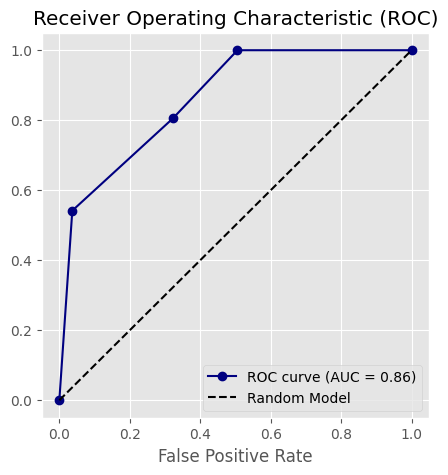

In [22]:
metricas(best_tree,xtest,ytest,True,0.5)

Accuracy: 0.889
Matriz de Confusión 
 [[2381   91]
 [ 242  286]]
Reporte de clasificación
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      2472
           1       0.76      0.54      0.63       528

    accuracy                           0.89      3000
   macro avg       0.83      0.75      0.78      3000
weighted avg       0.88      0.89      0.88      3000

AUC: 0.8620699562371286
Umbrales: [       inf 0.75085714 0.14759036 0.13740458 0.        ]


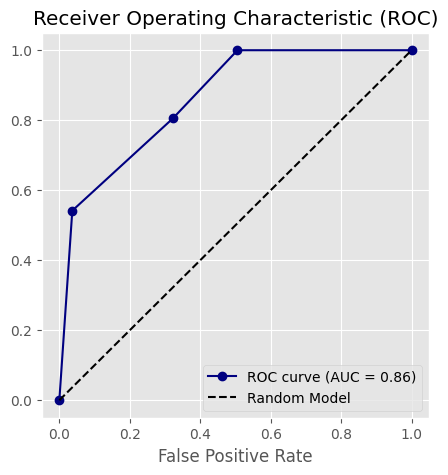

In [23]:
metricas(best_tree,xtest,ytest,True,0.15018868)

## Ajuste perfecto

In [35]:
xtrain,ytrain = student.drop(columns='Placement'),student['Placement']
xtest,ytest = student_test.drop(columns='Placement'),student_test['Placement']

In [38]:
model_tree = DecisionTreeClassifier(random_state=0)
model_tree.fit(xtrain,ytrain)

ypred = model_tree.predict(xtest)

print('Accuracy',accuracy_score(ytest,ypred))
print('confusion_matrix')
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

Accuracy 1.0
confusion_matrix
[[2472    0]
 [   0  528]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2472
           1       1.00      1.00      1.00       528

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



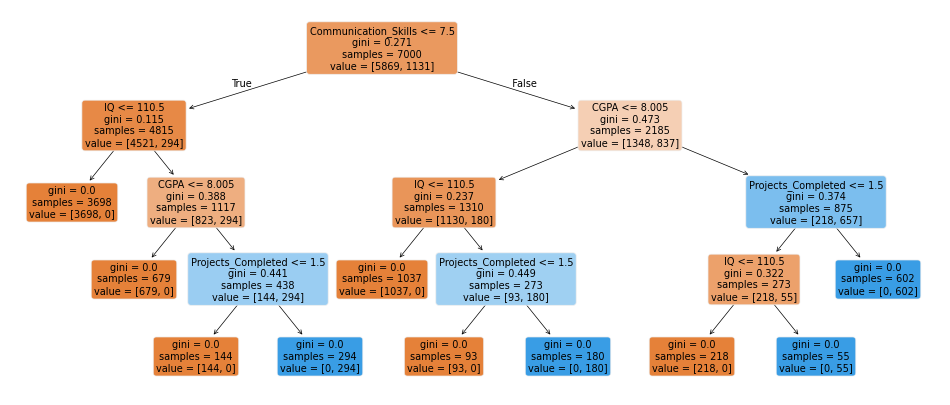

In [44]:
plt.figure(figsize=(12,5))
plot_tree(model_tree,feature_names=xtrain.columns,filled=True,rounded=True,fontsize=7)
plt.show()